In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import *
import math
import re
import os
import seaborn as sbn
sbn.set_style("whitegrid")

import matplotlib.image as mpimg
import glob

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def extract_potential(folders):
    
    results = {}

    for ifolder in folders:
        #e.g.  l_0.56,0_deg/computed.csv
        #file computed.csv
        #extract the angle
        distance = []
        pots = []
        deg = ifolder.split("/")[0].split("_")[0]
      
        reader = open(ifolder,"r").readlines()
        for read in reader:
            r = float(read.split(",")[0])
            pot = float(read.split(",")[1])
            distance.append(r)
            pots.append(pot)
            
        results[deg] = [ distance, pots ]
        #so results[deg][0] wil be distances and results[deg][1] potential
        
    
    return results

In [3]:
#Rotationally-averaged charge-dipole potential in a reaction field
#Functional form:
#(-4/3*kT)*(qu/4pieps0*r**2)**2 * ( (esp1 + esp2)**2 + (r**3/a**3)*eps1*(eps1*(r**3/a**3 - 2) - 2*eps2) ) 
computed  = extract_potential(glob.glob("*_deg/computed.dat"))
theory = extract_potential(glob.glob("*_deg/theory.dat"))

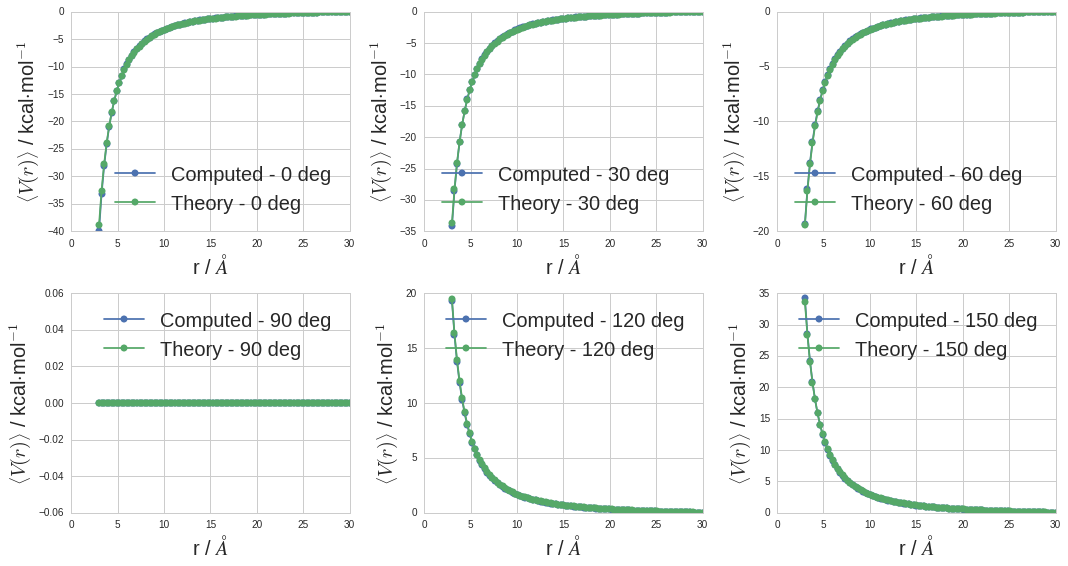

In [4]:
#plot
color = sbn.color_palette()
fig, ax = plt.subplots(2,3,figsize=(15,8))

#0
ax[0,0].plot(computed['0'][0],computed['0'][1],color=color[0],marker="o",label="Computed - 0 deg")
ax[0,0].plot(theory['0'][0],theory['0'][1],color=color[1],marker="o",label="Theory - 0 deg")
ax[0,0].set_xlabel("r / $\AA$",fontsize=20)
ax[0,0].legend(loc="best",fontsize=20)
ax[0,0].set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax[0,0].set_xlim(10,30)
#ax[0,0].set_ylim(0,0.5)

#30
ax[0,1].plot(computed['30'][0],computed['30'][1],color=color[0],marker="o",label="Computed - 30 deg")
ax[0,1].plot(theory['30'][0],theory['30'][1],color=color[1],marker="o",label="Theory - 30 deg")
ax[0,1].set_xlabel("r / $\AA$",fontsize=20)
ax[0,1].legend(loc="best",fontsize=20)
ax[0,1].set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax[0,0].set_xlim(10,30)
#ax[0,0].set_ylim(0,0.5)


#60
ax[0,2].plot(computed['60'][0],computed['60'][1],color=color[0],marker="o",label="Computed - 60 deg")
ax[0,2].plot(theory['60'][0],theory['60'][1],color=color[1],marker="o",label="Theory - 60 deg")
ax[0,2].set_xlabel("r / $\AA$",fontsize=20)
ax[0,2].legend(loc="best",fontsize=20)
ax[0,2].set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax[0,0].set_xlim(10,30)
#ax[0,0].set_ylim(0,0.5)

#90
ax[1,0].plot(computed['90'][0],computed['90'][1],color=color[0],marker="o",label="Computed - 90 deg")
ax[1,0].plot(theory['90'][0],theory['90'][1],color=color[1],marker="o",label="Theory - 90 deg")
ax[1,0].set_xlabel("r / $\AA$",fontsize=20)
ax[1,0].legend(loc="best",fontsize=20)
ax[1,0].set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax[0,0].set_xlim(10,30)
#ax[0,0].set_ylim(0,0.5)


#120
ax[1,1].plot(computed['120'][0],computed['120'][1],color=color[0],marker="o",label="Computed - 120 deg")
ax[1,1].plot(theory['120'][0],theory['120'][1],color=color[1],marker="o",label="Theory - 120 deg")
ax[1,1].set_xlabel("r / $\AA$",fontsize=20)
ax[1,1].legend(loc="best",fontsize=20)
ax[1,1].set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax[0,0].set_xlim(10,30)
#ax[0,0].set_ylim(0,0.5)

#150
ax[1,2].plot(computed['150'][0],computed['150'][1],color=color[0],marker="o",label="Computed - 150 deg")
ax[1,2].plot(theory['150'][0],theory['150'][1],color=color[1],marker="o",label="Theory - 150 deg")
ax[1,2].set_xlabel("r / $\AA$",fontsize=20)
ax[1,2].legend(loc="best",fontsize=20)
ax[1,2].set_ylabel(r"$\left \langle V(r) \right \rangle$ / kcal$\cdot$mol$^{-1}$" ,fontsize=20)
#ax[0,0].set_xlim(10,30)
#ax[0,0].set_ylim(0,0.5)
plt.tight_layout()



In [5]:
def natural_sort(list_to_sort):
    """Function to sort a list in a natural order"""
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]

    return sorted(list_to_sort,key=alphanum_key)


#compute the differences between the two curves, once the difference is less then 0.01kcal/mol print out the distsance
results = {}

keys = []
for key in computed.keys():
    keys.append(key)
    
keys = natural_sort(keys)


for key in keys:
    #print("####")
    #print(key)
    #print("####")
    for i,pots in enumerate(computed[key][1],0):
        diff = pots - theory[key][1][i]
        #print(diff)
        if abs(diff)<0.01:
            results[key] = [computed[key][0][i]]
            break
            
            
#for key in keys:
#    print("Angle %.4f distance: %.4f" % (float(key),float(results[key][0])))
    

#elem = "150"
#for i,pots in enumerate(computed[elem][1],0):
#    diff = pots -theory[elem][1][i]
#    if diff < 0.01:
#        print(computed[elem][0][i])